<a href="https://colab.research.google.com/github/sabinaML/Python_probability_theory_statistics/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;


In [ ]:
#https://drive.google.com/file/d/15Kp9HdHMF9WNA0Q9w61q4J1Qiund851p/view?usp=sharing
! gdown 15Kp9HdHMF9WNA0Q9w61q4J1Qiund851p


Downloading...
From: https://drive.google.com/uc?id=15Kp9HdHMF9WNA0Q9w61q4J1Qiund851p
To: /content/bmw.csv
100% 593k/593k [00:00<00:00, 38.8MB/s]


In [ ]:
#датасет по продажам автомобилей bmw
df=pd.read_csv('/content/bmw.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [ ]:
#пропуски
df.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [ ]:
#корреляция значенийЮ , Наиболшая зависимость цены от года выпуска
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


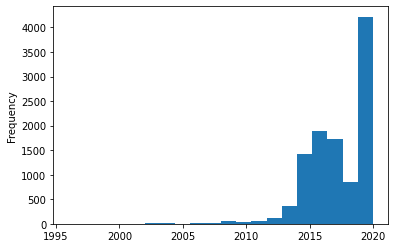

In [ ]:
# гистограмма распределения по году выпуска машин, Наибольшее число машин - 2020 года. 
#Количество машин старых годов - едиичное, и их можно будет убрать при необходимости

df.year.plot(kind='hist', bins = 20, xlabel = 'Год', ylabel = 'Частота')


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [ ]:
df1=df.groupby('year', dropna=False).agg({'price':['mean','median', 'count']})
df1

price               
              mean   median count
year                             
1996   5995.000000   5995.0     1
1997   3950.000000   3950.0     1
1998   3950.000000   3950.0     1
1999   3285.000000   3972.5     4
2000   1624.500000   1624.5     2
2001   7333.333333   5950.0     3
2002   5486.500000   3494.5     6
2003   9222.500000   9222.5     2
2004   8213.166667   4120.0    12
2005   5390.166667   4685.0     6
2006   5252.714286   4097.5    14
2007   4830.500000   4492.5    16
2008   6240.043478   5985.0    23
2009   6618.100000   5495.0    30
2010   7490.390244   6695.0    41
2011   9099.098039   8470.0    51
2012   9533.689076   8990.0   119
2013  11118.355742  10490.0   357
2014  13323.598802  12800.0   501
2015  15199.753796  14000.0   922
2016  16638.403826  15798.0  1882
2017  19267.174898  18491.0  1721
2018  22721.656840  21295.0   848
2019  31025.864275  27990.0  3485
2020  35377.680764  32583.0   733

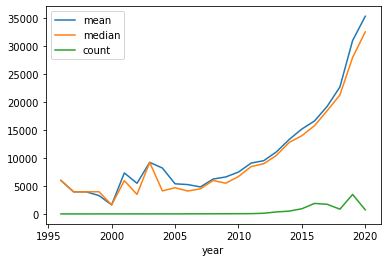

In [ ]:
#зависимость средней цены от года подтверждает теорию, что чем новее машина - тем выше средняя/медианная цена
df1['price'].plot()

In [ ]:
#сгруппируем по модели, чтобы посмотреть самые дорогие модели
df2=df.groupby('model', dropna=False).agg({'price':['mean', 'count']})
df2.columns = ['price_mean','price_count']
df2=df2.sort_values('price_count', ascending=False)
#убираем модели с низкой частотой, оставляем только те, которых более 100
df2=df2[df2['price_count']>100]
df2

,price_mean,price_count
model,,
3 Series,19880.857962,2443
1 Series,15821.670391,1969
2 Series,19539.371847,1229
5 Series,22537.428030,1056
4 Series,22498.418090,995
X1,19816.564677,804
X3,27758.310345,551
X5,39651.196581,468
X2,28486.663194,288


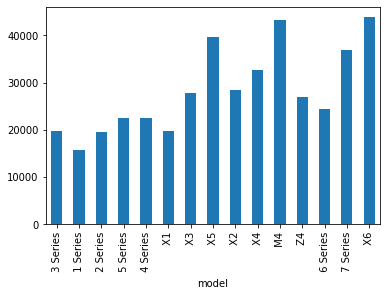

In [ ]:
# из них самые дорогие модели - X6, дешевые - 1 series
df2['price_mean'].plot(kind='bar')

In [ ]:
df['mileage_group'] = pd.cut(df['mileage'], 10)

In [ ]:
df3=pd.pivot_table(df,index = 'mileage_group', columns = 'year', values = 'price', aggfunc = 'mean')
df3

year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mileage_group,,,,,,,,,,,,,,,,,,,,,
"(-212.999, 21400.9]",NaN,NaN,NaN,NaN,NaN,NaN,14995.0,NaN,NaN,NaN,...,20999.000000,NaN,11846.857143,14585.125000,17153.222222,18691.867647,20821.045455,23434.236542,31077.515598,35377.680764
"(21400.9, 42800.8]",5995.0,NaN,NaN,NaN,NaN,13000.0,NaN,14950.0,8750.000000,NaN,...,10658.666667,11328.153846,12129.492537,14358.664474,16602.272040,17164.930811,19190.578409,21146.860465,23136.272727,NaN
"(42800.8, 64200.7]",NaN,3950.0,3950.0,3972.5,NaN,5950.0,NaN,NaN,17433.333333,4616.0,...,9697.500000,10066.564103,11612.687943,13278.155914,14794.749129,15606.358911,16353.967914,17374.055556,NaN,NaN
"(64200.7, 85600.6]",NaN,NaN,NaN,2597.5,NaN,NaN,5494.5,3495.0,10470.000000,4995.0,...,9098.923077,9098.790698,10388.166667,12641.735849,12797.726496,13597.322581,14538.333333,21735.000000,25780.000000,NaN
"(85600.6, 107000.5]",NaN,NaN,NaN,NaN,1624.5,3050.0,2350.0,NaN,3872.500000,NaN,...,9084.500000,8613.941176,9408.500000,11097.782609,11227.472727,11496.784314,11852.142857,NaN,NaN,NaN
"(107000.5, 128400.4]",NaN,NaN,NaN,NaN,NaN,NaN,2292.5,NaN,2245.000000,10999.0,...,6747.000000,9737.500000,7244.500000,7995.750000,12434.125000,11465.000000,10393.000000,NaN,NaN,NaN
"(128400.4, 149800.3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2888.000000,2499.0,...,4990.000000,7559.250000,8595.000000,7314.000000,9096.500000,13000.000000,NaN,NaN,NaN,NaN
"(149800.3, 171200.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1445.000000,NaN,...,3500.000000,NaN,NaN,9000.000000,NaN,NaN,NaN,NaN,NaN,NaN
"(171200.2, 192600.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3493.000000,NaN,8999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


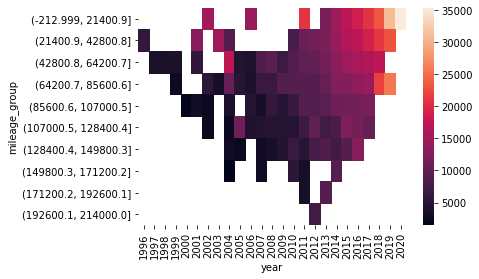

In [ ]:
#зависимость средней цены от пробега и года. Самая дорогая категория - наиболее светлая область (меньший пробег и свежий год).
#Чем старее год  - тем ниже цена
sns.heatmap(df3)